1. 파일 업로드 및 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250211 쇼핑몰 지점별 매출액 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250211 쇼핑몰 지점별 매출액 예측/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250211 쇼핑몰 지점별 매출액 예측/sample_submission.csv')

2. EDA

In [ ]:
train.head(10)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
5,6,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,8.106,False,1439541.59
6,7,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,8.106,False,1472515.79
7,8,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,8.106,False,1404429.92
8,9,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,7.808,False,1594968.28
9,10,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,7.808,False,1545418.53


In [ ]:
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [ ]:
px.scatter(data_frame = train, x = 'Unemployment', y = 'Weekly_Sales')

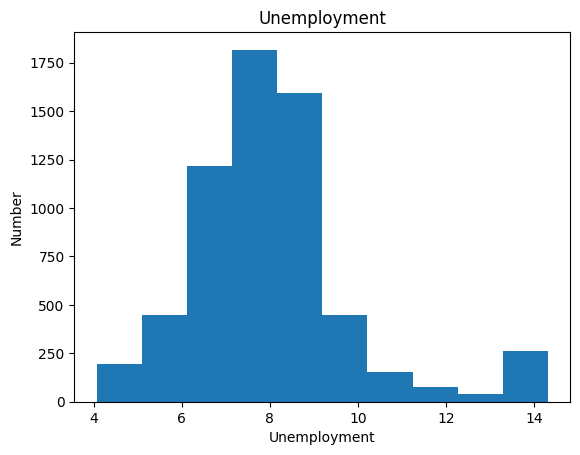

In [ ]:
plt.hist(train['Unemployment'], bins=10)
plt.xlabel("Unemployment")
plt.ylabel("Number")
plt.title("Unemployment")
plt.show()

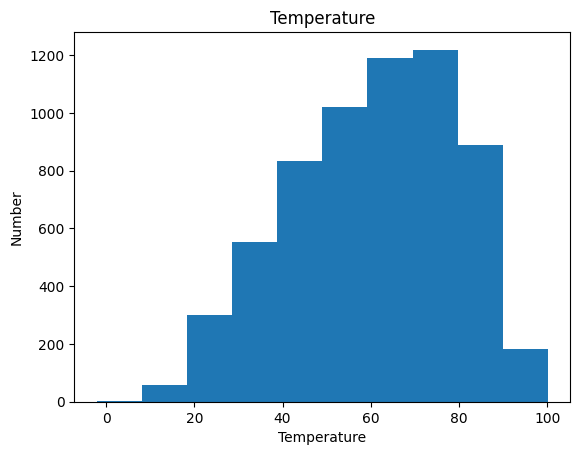

In [ ]:
plt.hist(train['Temperature'], bins=10)
plt.xlabel("Temperature")
plt.ylabel("Number")
plt.title("Temperature")
plt.show()

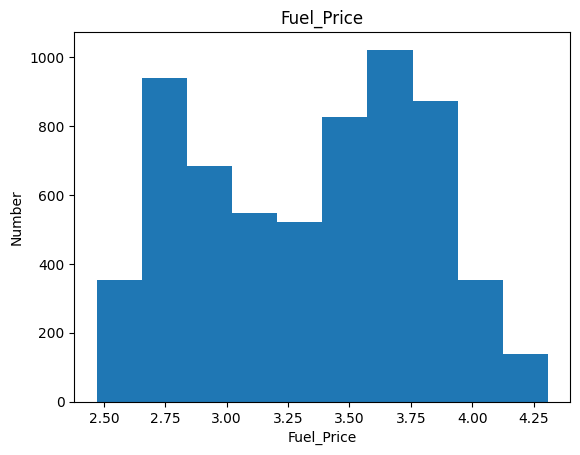

In [ ]:
plt.hist(train['Fuel_Price'], bins=10)
plt.xlabel("Fuel_Price")
plt.ylabel("Number")
plt.title("Fuel_Price")
plt.show()

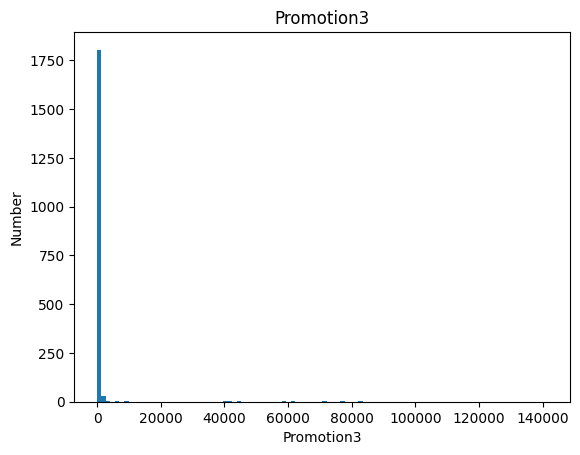

In [ ]:
plt.hist(train['Promotion3'], bins=100)
plt.xlabel("Promotion3")
plt.ylabel("Number")
plt.title("Promotion3")
plt.show()

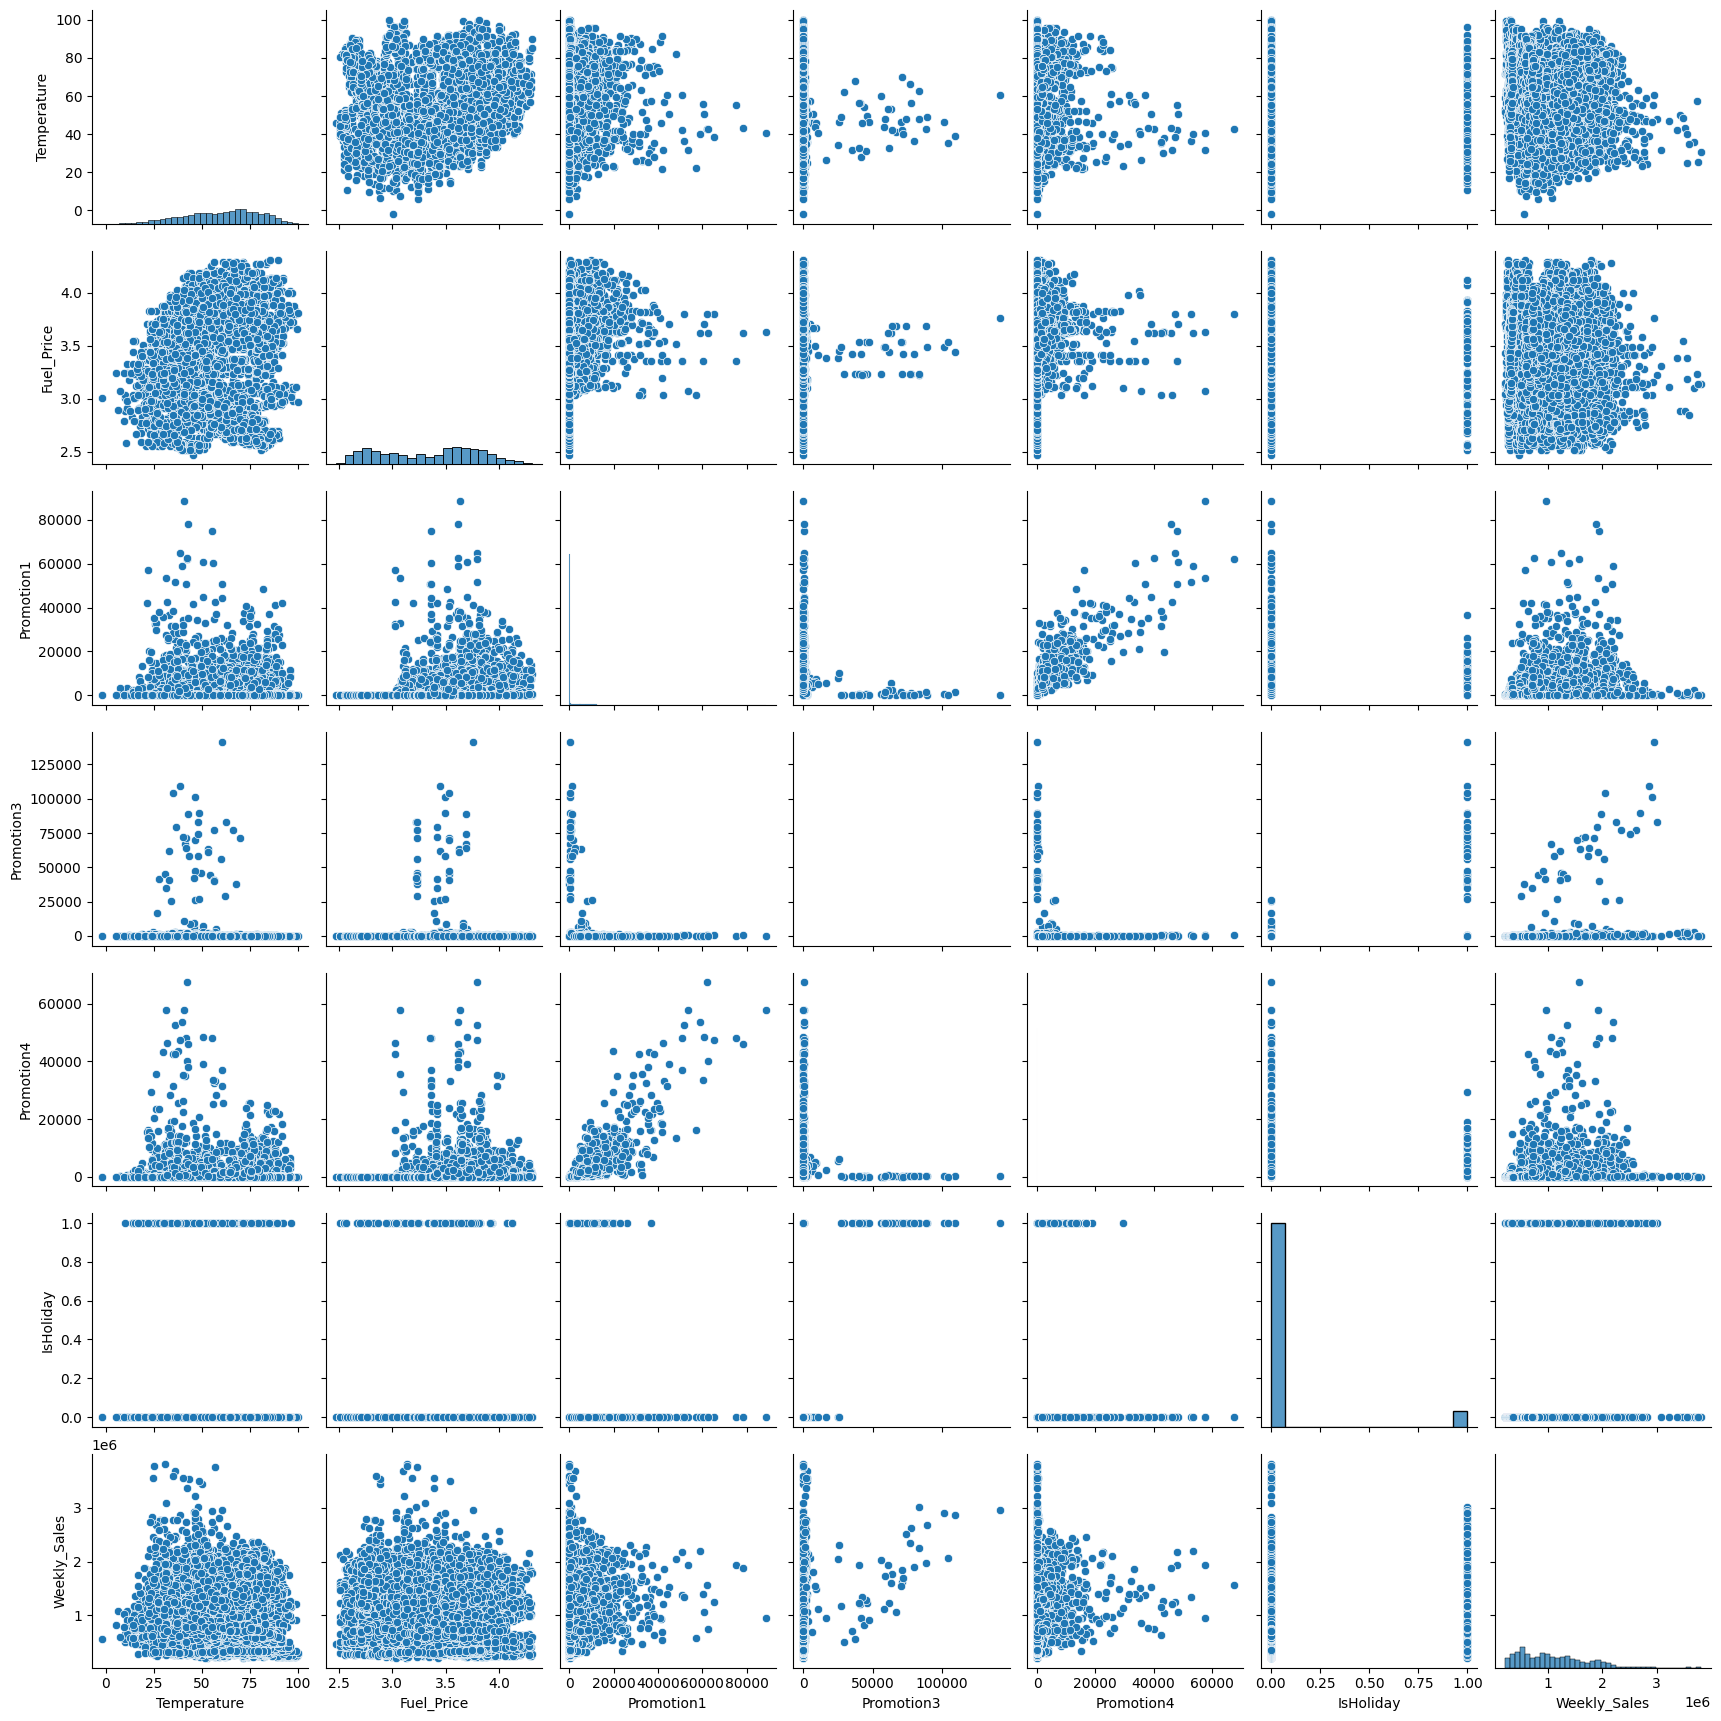

In [ ]:
# 기온, 연료 가격, 프로모션, 휴일 여부와 매출액 관계 시각화
sns.pairplot(train[['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion3', 'Promotion4', 'IsHoliday', 'Weekly_Sales']])
plt.show()

# **-> 실업률, 기온, 주유소 연료비, Promotion 직접적인 연관성 없는것으로 보임**

1) 추가 EDA를 위한 피쳐 엔지니어링, 전처리

In [2]:
# 결측값 처리
train = train.fillna(0)
test = test.fillna(0)

# 날짜 Feature 생성 (일, 월, 연도 )
# '일/월/연' 형식을 '연-월-일' 형식으로 변환
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")

# 다시 datetime 형식으로 변환하여 연, 월, 일 추출
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year  # 연(year)
train['Month'] = train['Date'].dt.month  # 월(month)
train['Day'] = train['Date'].dt.day # 일(day)

# '일/월/연' 형식을 '연-월-일' 형식으로 변환
test['Date'] = pd.to_datetime(test['Date'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")

# 다시 datetime 형식으로 변환하여 연, 월, 일 추출
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year  # 연(year)
test['Month'] = test['Date'].dt.month  # 월(month)
test['Day'] = test['Date'].dt.day # 일(day)

# 휴일 Feature 변환 (True/False -> 1/0)
train['IsHoliday'] = train['IsHoliday'].astype(int)
test['IsHoliday'] = test['IsHoliday'].astype(int)

In [3]:
# 불필요 칼럼 삭제
train=train.drop(columns=['id'])
train=train.drop("Temperature",axis=1)
train=train.drop("Fuel_Price",axis=1)
train=train.drop(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'],axis=1)
train=train.drop("Unemployment",axis=1)

test=test.drop(columns=['id'])
test=test.drop("Temperature",axis=1)
test=test.drop("Fuel_Price",axis=1)
test=test.drop(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'],axis=1)
test=test.drop("Unemployment",axis=1)

In [4]:
train.head()

,Store,Date,IsHoliday,Weekly_Sales,Year,Month,Day
0,1,2010-02-05,0,1643690.90,2010,2,5
1,1,2010-02-12,1,1641957.44,2010,2,12
2,1,2010-02-19,0,1611968.17,2010,2,19
3,1,2010-02-26,0,1409727.59,2010,2,26
4,1,2010-03-05,0,1554806.68,2010,3,5


2) 엔지니어링 후 시각화

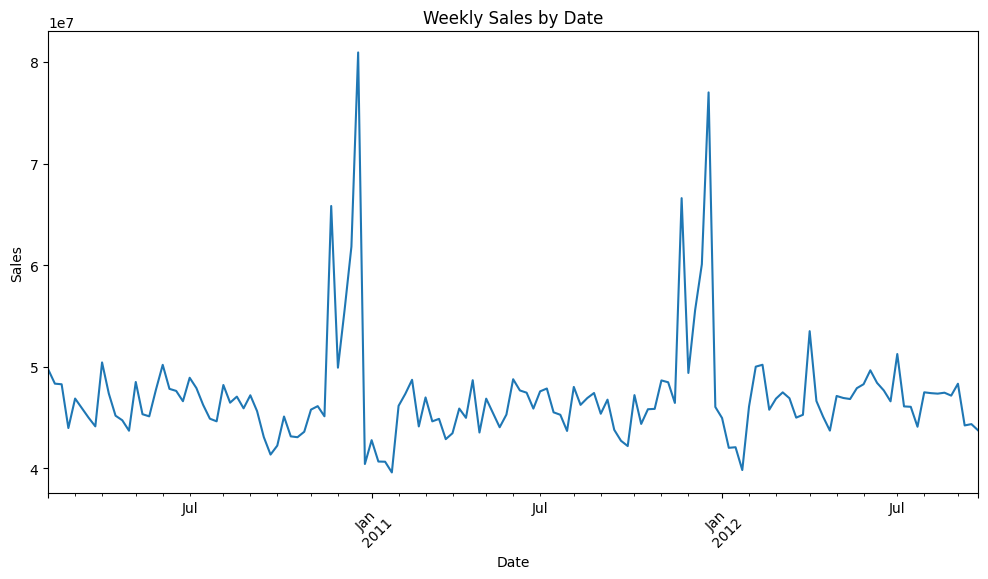

In [5]:
# 날짜별 매출액 변화 시각화
plt.figure(figsize=(12, 6))
train.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Weekly Sales by Date")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

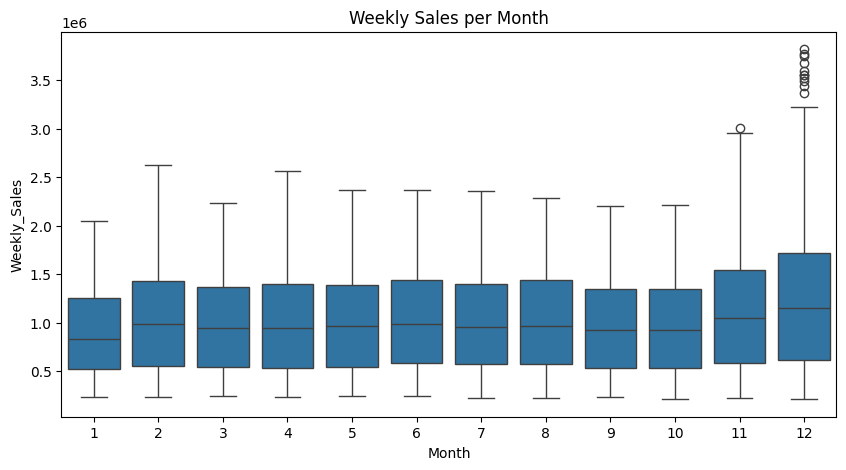

In [6]:
# 월별 매출액 변화
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Weekly_Sales', data=train)
plt.title("Weekly Sales per Month")
plt.show()

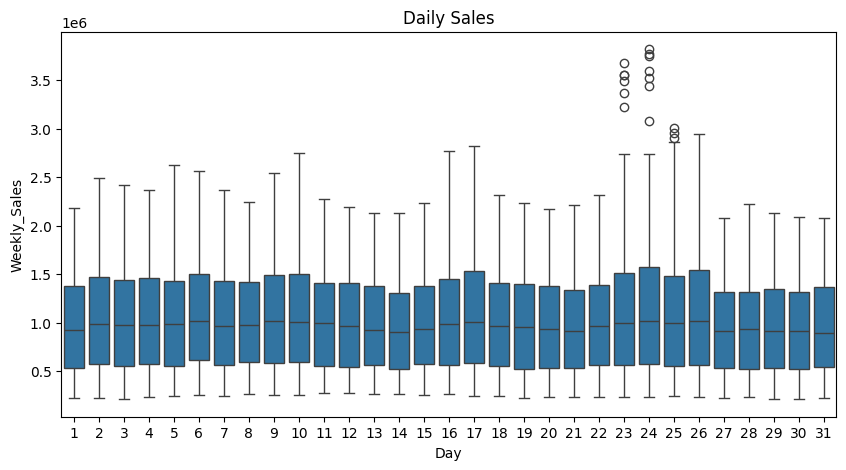

In [5]:
# 일별 매출액 평균 (1일 ~ 31일 기준)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Day', y='Weekly_Sales', data=train)
plt.title("Daily Sales")
plt.show()

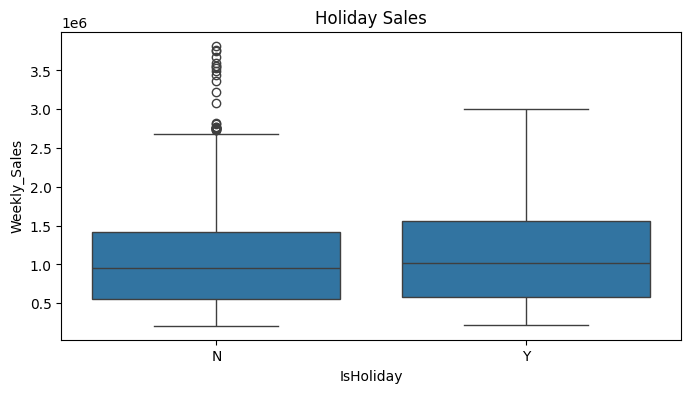

In [9]:
# 휴일 여부에 따른 매출 차이 분석
plt.figure(figsize=(8, 4))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title("Holiday Sales")
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

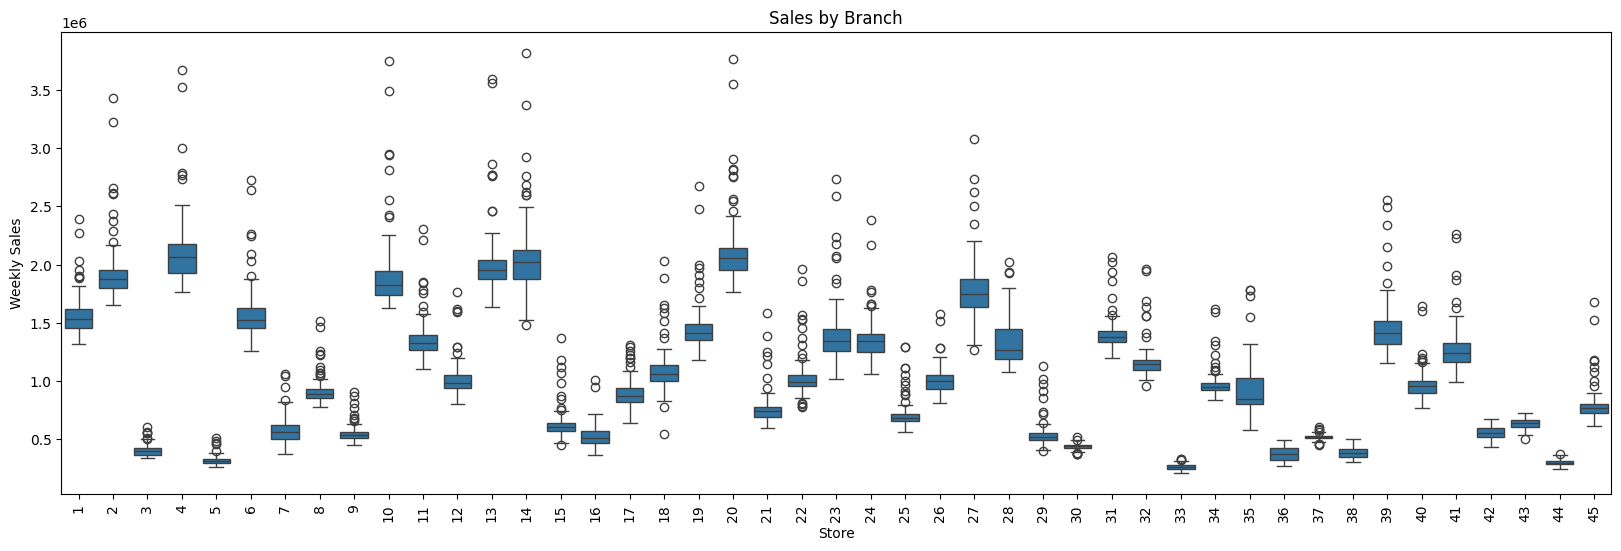

In [6]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=train['Store'].astype(str), y='Weekly_Sales', data=train)
plt.xticks(rotation=90)
plt.title("Sales by Branch")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

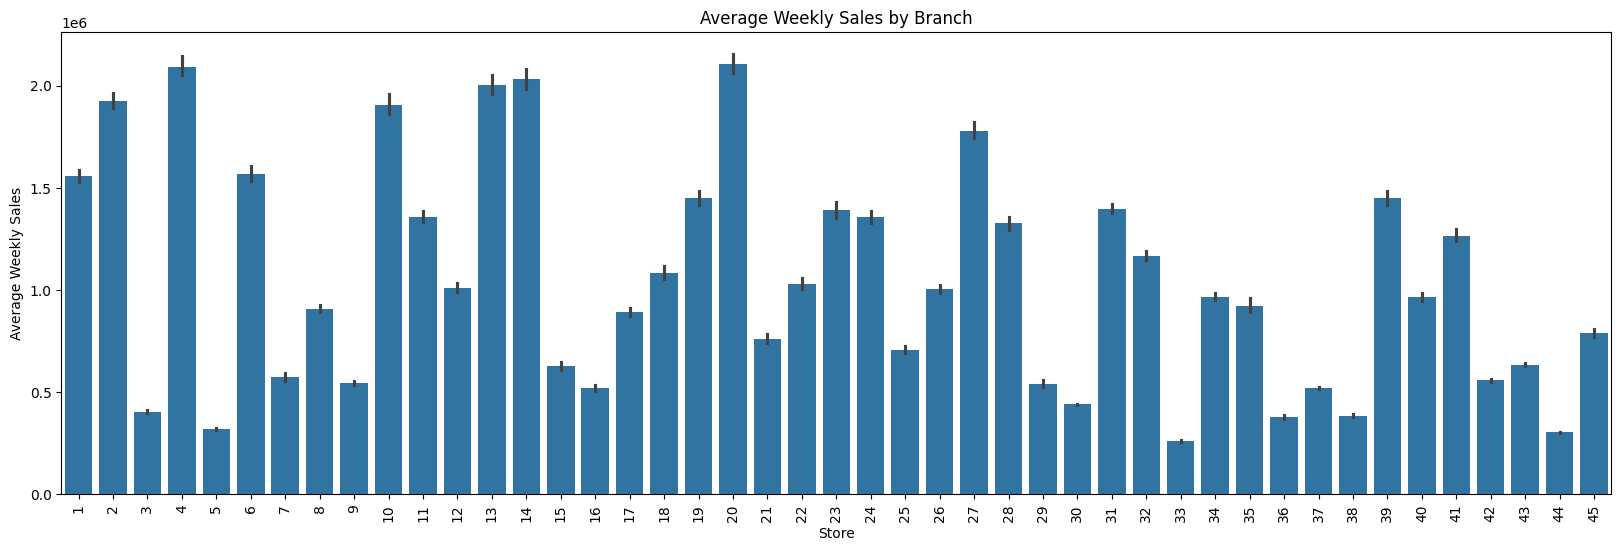

In [7]:
plt.figure(figsize=(20, 6))
sns.barplot(x=train['Store'].astype(str), y='Weekly_Sales', data=train, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Weekly Sales by Branch")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()

-> 날짜와 휴일에 따른 매출 연관성 확인

3. Modeling

In [8]:
# Feature & Target 분리
X = train.drop(columns=['Weekly_Sales', 'Date'])
y = train['Weekly_Sales']

In [9]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 모델 학습 (RandomForestRegressor 활용)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# 검증 데이터 예측
y_pred = model.predict(X_val)

In [14]:
# 성능 평가 (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'검증 데이터 RMSE: {rmse:.2f}')

검증 데이터 RMSE: 117531.50


5. 제출파일 생성

In [15]:
# 테스트 데이터 예측 및 제출 파일 생성
test_pred = model.predict(test.drop(columns=['Date']))
sample_submission['Weekly_Sales'] = test_pred

In [16]:
sample_submission.to_csv('250214_submission_RF.csv', index=False)